<a href="https://colab.research.google.com/github/mahersalman/Introducation_To_Cloud_Computing/blob/main/Tutorials/Cloud%20Tutorial%204/Tut4ToDo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import json
import pandas as pd
from collections import Counter


#Load Json File (data.json)

In [2]:
!git clone https://github.com/mahersalman/Introducation_To_Cloud_Computing.git
json_path = './Introducation_To_Cloud_Computing/Tutorials/Cloud Tutorial 4/data.json'
with open(json_path, "r") as fid:
    data = json.load(fid)

Cloning into 'Introducation_To_Cloud_Computing'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 44 (delta 9), reused 19 (delta 2), pack-reused 0
Receiving objects: 100% (44/44), 69.64 KiB | 432.00 KiB/s, done.
Resolving deltas: 100% (9/9), done.


#Chose Doucment


In [4]:
df = pd.DataFrame(data)

# Function to plot bar graph
def plot_bar_graph(document):
    filtered_df = df[df['Document'] == document]
    tab_counts = filtered_df['Tab'].value_counts()
    plt.figure(figsize=(10, 6))
    tab_counts.plot(kind='bar')
    plt.title(f'Actions Count per Tab for Document: {document}')
    plt.xlabel('Tab')
    plt.ylabel('Number of Actions')
    plt.show()

# Get unique documents
documents = df['Document'].unique()

# Create dropdown widget
dropdown = widgets.Dropdown(
    options=documents,
    description='Document:',
    disabled=False,
)

# Handle dropdown value change
def on_dropdown_change(change):
    if change['type'] == 'change' and change['name'] == 'value':

        clear_output(wait=True)
        display(dropdown)
        plot_bar_graph(change['new'])


dropdown.observe(on_dropdown_change)

# Display the dropdown
display(dropdown)


Dropdown(description='Document:', options=('Industry 4.0 Project', 'Part Studio 1 Copy 1.stl', 'Part Studio 1.…

In [5]:
# @title Month/Year DropDown
month = [1,2,3,4,5,6,7,8,9,10,11,12]
year = [2022,2023]
print('chose Month')
dropdown1 = widgets.Dropdown(
    options = month
)
display(dropdown1)
print('chose Year')
dropdown2 = widgets.Dropdown(
    options = year
)
display(dropdown2)


chose Month


Dropdown(options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), value=1)

chose Year


Dropdown(options=(2022, 2023), value=2022)

In [6]:
class Date:
  def __init__(self,year = 0 ,month = 0,counter = 0):
    self.year = year
    self.month = month
    self.counter = counter
  def toPrint(self):
    print(f"({self.year}/{self.month}) => {self.counter}")
  def getDate(self):
    return f"{self.year}/{self.month}"

  def getCounter(self):
    return self.counter

def count_entries(data,year,month):
  result = []
  for i in year:
    for j in month:
      counter = sum((pd.to_datetime(df['Time']).dt.year == i) & (pd.to_datetime(df['Time']).dt.month == j))

      if counter > 0 :
        result.append(Date(i,j,counter))
  return result




In [7]:
df = pd.DataFrame(data)
Date = count_entries(df,year,month)

['2022/11', '2022/12', '2023/1']
[8712, 843, 242]


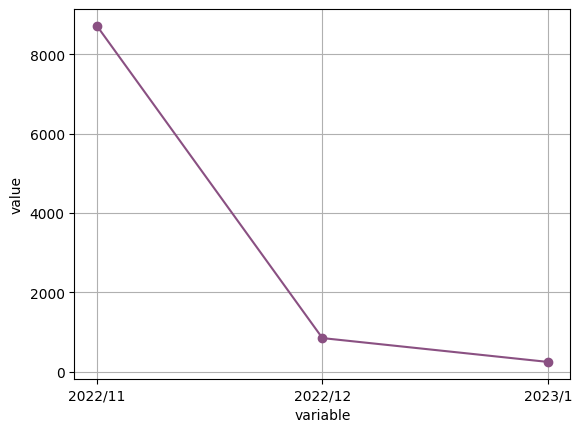

In [8]:

xAxis = []
yAxis = []
for i in range(len(Date)):
  xAxis.append(Date[i].getDate())
  yAxis.append(Date[i].getCounter())

print(xAxis)
print(yAxis)

plt.grid(True)

plt.plot(xAxis,yAxis, color = '#8a5082', marker='o')
plt.xlabel('variable')
plt.ylabel('value')
plt.show()






Dropdown(description='Document:', options=('Industry 4.0 Project', 'Part Studio 1 Copy 1.stl', 'Part Studio 1.…

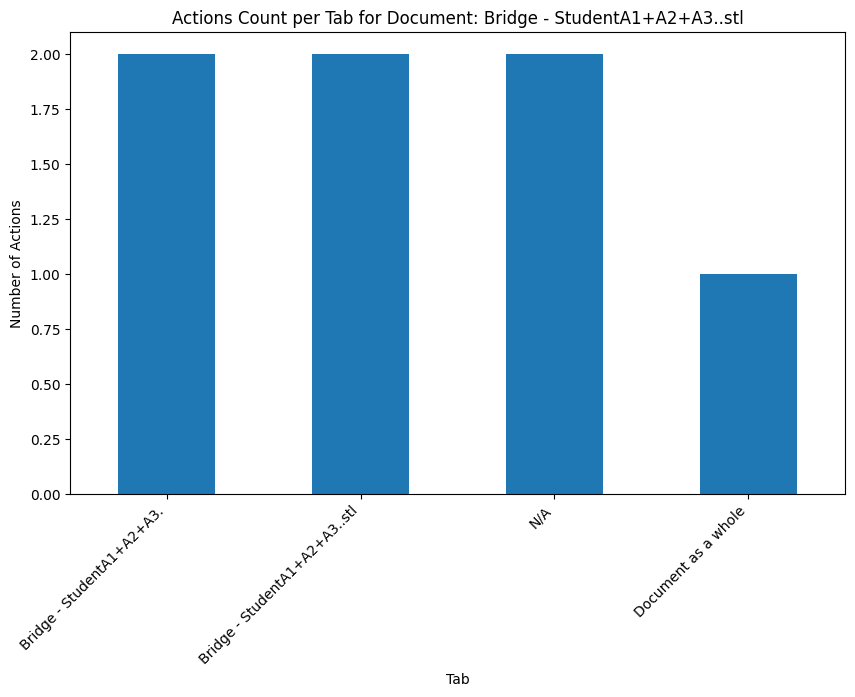

In [9]:

# Function to plot bar graph
def plot_bar_graph(document):
    filtered_df = df[df['Document'] == document]
    tab_counts = filtered_df['Tab'].value_counts()
    plt.figure(figsize=(10, 6))
    tab_counts.plot(kind='bar')
    plt.title(f'Actions Count per Tab for Document: {document}')
    plt.xlabel('Tab')
    plt.ylabel('Number of Actions')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Get unique documents
documents = df['Document'].unique()

# Create dropdown widget
dropdown3 = widgets.Dropdown(
    options=documents,
    description='Document:',
    disabled=False,
    value=documents[0]
)

# Handle dropdown value change
def on_dropdown_change(change):
    if change['type'] == 'change' and change['name'] == 'value':

        clear_output(wait=True)
        display(dropdown)
        plot_bar_graph(change['new'])


dropdown3.observe(on_dropdown_change)

# Display the dropdown
display(dropdown3)

In [10]:
import plotly.express as px

# Prepare the data for the pie chart
document_counts = df['Document'].value_counts().reset_index()
document_counts.columns = ['Document', 'Count']

# Create an interactive pie chart
fig = px.pie(
    document_counts,
    names='Document',
    values='Count',
    title='Document Usage Distribution',
    hover_data={'Count': True},  # Add counts to hover data
    hole=0.3  # Optional: create a donut chart
)

fig.update_traces(
    textinfo='none',  # Hide the text on the pie chart
    hovertemplate='<b>%{label}</b><br>Count: %{value}<br>Percentage: %{percent:.2%}'  # Hover template
)

fig.update_layout(
    legend_title_text='Documents',
    legend=dict(
        x=1,
        y=0.5,
        traceorder='normal',
        font=dict(size=12),
    ),
    margin=dict(l=0, r=200, t=50, b=50),  # Adjust margins to make room for the legend
)

fig.show()

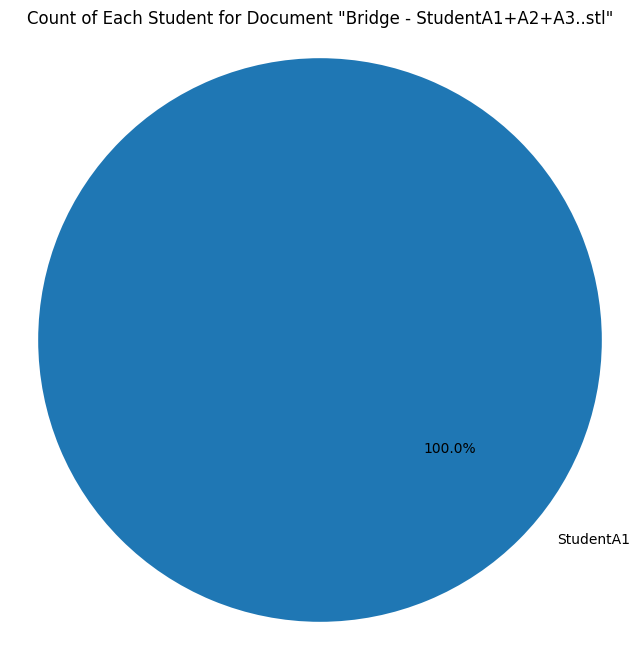

In [11]:

def sumActsStudBydoc(document):
   filtered_df = df[df['Document'] == document]
   user_counts = filtered_df['User'].value_counts()
   unique_users = user_counts.size
   # Plotting the pie chart
   plt.figure(figsize=(8, 8))
   plt.pie(user_counts, labels=user_counts.index, autopct='%1.1f%%', startangle=140)
   plt.title(f'Count of Each Student for Document "{document}"')
   plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
   plt.show()
sumActsStudBydoc(dropdown3.value)